# Ecuaciones para la colisión elástica de dos bloques

En una colisión elástica entre dos bloques, las velocidades después de la colisión se determinan a partir de los principios de **conservación del momento lineal** y **conservación de la energía cinética**.

## Variables
- $ m_1 $: Masa del bloque 1.
- $ m_2 $: Masa del bloque 2.
- $ v_1 $: Velocidad inicial del bloque 1.
- $ v_2 $: Velocidad inicial del bloque 2.
- $ v_1' $: Velocidad del bloque 1 después de la colisión.
- $ v_2' $: Velocidad del bloque 2 después de la colisión.

## 1. Conservación del momento lineal
\begin{equation}
m_1 v_1 + m_2 v_2 = m_1 v_1' + m_2 v_2'
\end{equation}

## 2. Conservación de la energía cinética
\begin{equation}
\frac{1}{2} m_1 v_1^2 + \frac{1}{2} m_2 v_2^2 = \frac{1}{2} m_1 {v_1'}^2 + \frac{1}{2} m_2 {v_2'}^2
\end{equation}

## 3. Velocidades después de la colisión
Resolviendo las ecuaciones anteriores, las velocidades después de la colisión son:

\begin{equation}
v_1' = \frac{(m_1 - m_2) v_1 + 2 m_2 v_2}{m_1 + m_2}
\end{equation}

\begin{equation}
v_2' = \frac{(m_2 - m_1) v_2 + 2 m_1 v_1}{m_1 + m_2}
\end{equation}


In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

3
31
314
3141
31415
314159


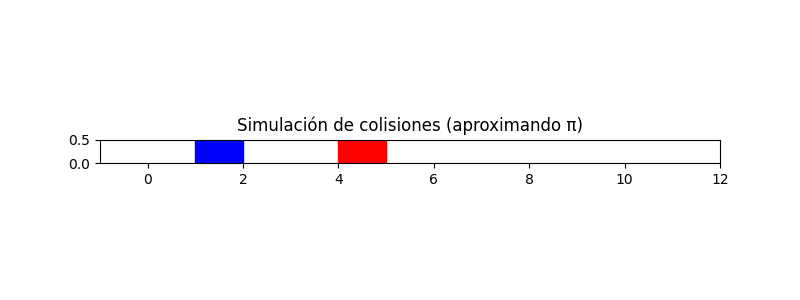

In [2]:
def collision(m1, m2, v1, v2):
    v1f = (2 * m2 * v2 + (m1 - m2) * v1) / (m1 + m2)
    v2f = (2 * m1 * v1 + (m2 - m1) * v2) / (m1 + m2)
    return v1f, v2f


def simulate(m1, m2, x1, x2, v1, v2, Nmax=1000000, dt=0.01):
    trace = []
    collisions = 0

    for _ in range(Nmax):
        x1 += v1 * dt
        x2 += v2 * dt


        if x1 <= 0:
            x1 = 0
            v1 *= -1
            collisions += 1

        if x1 >= x2:
            x1 = x2
            v1, v2 = collision(m1, m2, v1, v2)
            collisions += 1


        trace.append([x1, x2, collisions])
        if v1 > v2 or v1 <= 0:
            continue
        else:
            break

    return trace


# Parámetros de ejemplo

digits = list(range(1, 7))
estimated_collisions = []

for d in digits:
    m1 = 1
    m2 = 100 ** (d - 1)
    x1 = 1
    x2 = 10
    v1 = 0
    v2 = -2

    trace = simulate(m1, m2, x1, x2, v1, v2)
    cols = trace[-1][2]
    print(cols)


m1 = 1
m2 = 10000 
x1 = 1
x2 = 4
v1 = 0
v2 = -2

trace = simulate(m1, m2, x1, x2, v1, v2)

fig, ax = plt.subplots(figsize=(8, 3))
ax.set_xlim(-1, 12)
ax.set_ylim(0, 0.5)
ax.set_aspect("equal")
ax.set_title("Simulación de colisiones (aproximando π)")

block1 = plt.Rectangle((x1, 0), 1, 1, color="blue")
block2 = plt.Rectangle((x2, 0), 1, 1, color="red")
ax.add_patch(block1)
ax.add_patch(block2)

collision_text = ax.text(6, 1.7, "", fontsize=12)


def animate(i):
    if i >= len(trace):
        print(f"Simulación terminada en {trace[-1][2]} colisiones")
        return
    x1, x2, collisions = trace[i]
    block1.set_x(x1)
    block2.set_x(x2)
    collision_text.set_text(f"Colisiones: {collisions}")
    return block1, block2, collision_text


ani = animation.FuncAnimation(fig, animate, frames=len(trace),interval=20)
plt.show()